In [1]:
%matplotlib inline

## Definitions
### These are values defined in the Arduino code and documented in "Bluetooth.java" in the application

In [2]:
D_SAMPLING_FREQUENCY = 250.0

### Pull in the libraries and define the functions we will be using

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

### This function pulls in the data for each channel

In [4]:
def getChannelData(iChannel, strTestCase):
    cwd = os.getcwd()
    cwd = cwd+'\\TrainingData\\'+strTestCase

    f = []
    for (dirpath, dirnames, filenames) in os.walk(cwd):
        f.extend(filenames)
        break
        
    strFileSearch = 'Trace0' + str(iChannel)
    strFiles = filter(lambda x:strFileSearch in x, f)
    
    
    for idx in range(0, len(strFiles)):
        fh = open(cwd+'\\'+strFiles[idx], 'rb')
        # read the data into numpy
        if(idx==0):
            xEnd = np.fromfile(fh, dtype=('>f'))
        else:
            xEnd = np.append(x, np.fromfile(fh, dtype=('>f')))
        fh.close()
    
    # We have to switch the underlying NumPy array to native system
    # Great write up at: http://pandas.pydata.org/pandas-docs/stable/gotchas.html. 
    # If you don't do this you get an error: ValueError: Big-endian buffer not supported on little-endian compiler
    x = xEnd.byteswap().newbyteorder()
    
    return (x,strFiles)

### This function pulls the arrays from the data file function into a single data frame and addes the extracted values

In [5]:
def getDataAsFrame(strTestCase):

    # Read the data in
    (x1,strFiles1) = getChannelData(1,strFolder)
    (x2,strFiles2) = getChannelData(2,strFolder)
    (x3,strFiles3) = getChannelData(3,strFolder)
    (x4,strFiles4) = getChannelData(4,strFolder)
    t = np.divide(range(0,len(x1)),D_SAMPLING_FREQUENCY)

    # Construct the data frame
    dfData = pd.DataFrame(data={('t'):t,
                                ('XAcc'):x1, 
                                ('YAcc'):x2, 
                                ('ZAcc'):x3, 
                                ('Light'):x4,
                                'Surface':strTestCase})
    
    return dfData

### This function appends one dataframe to another

In [6]:
def appendDataAsFrame(strTestCase, dfData):
    dfNew = getDataAsFrame(strTestCase)
    dfDataOut = dfData.append(dfNew)
    dfDataOut = dfDataOut.reset_index(drop=True)

    return dfDataOut

### This function plots the timebase data in the data frame

In [14]:
def plotFolder(dfDataPlot, strClass):
    
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.subplots_adjust(wspace=.5, hspace=0.5)
    
    strColName = 'XAcc'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[0,0], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)

    strColName = 'YAcc'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[0,1], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)

    strColName = 'ZAcc'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[1,0], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)

    strColName = 'Light'
    ax = dfDataPlot.plot(x='t', y=strColName, 
                     ax=axes[1,1], legend=True, figsize=(10,10))
    ax.set_xlabel('Time, seconds')
    ax.set_ylabel('Amplitude, ADC counts')
    ax.set_title(strColName+'_'+strClass)


### Get the data into python

In [15]:
strFolder = 'Cobble1'
dfData = getDataAsFrame(strFolder)
strFolder = 'Carpet1'
dfData = appendDataAsFrame(strFolder, dfData)
strFolder = 'Tile1'
dfData = appendDataAsFrame(strFolder, dfData)
strFolder = 'Cobble2'
dfData = appendDataAsFrame(strFolder, dfData)
strFolder = 'Carpet2'
dfData = appendDataAsFrame(strFolder, dfData)
strFolder = 'Tile2'
dfData = appendDataAsFrame(strFolder, dfData)


### Plot out the data

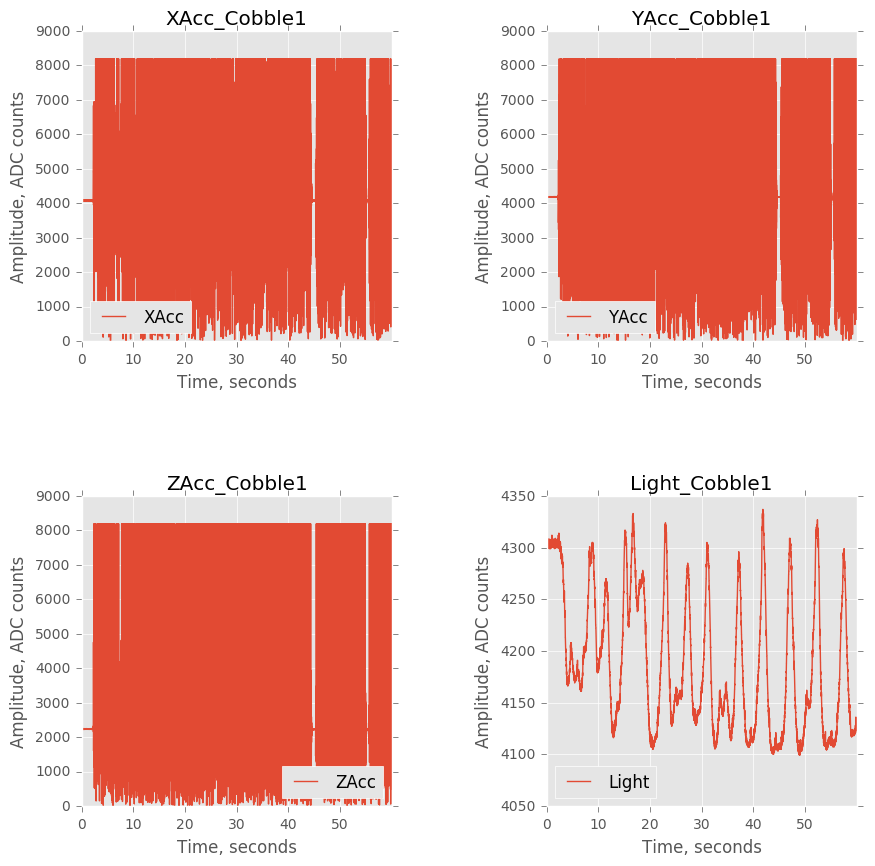

In [16]:
strClass = 'Cobble1'
plotFolder(dfData.loc[dfData['Surface'] == strClass], strClass)

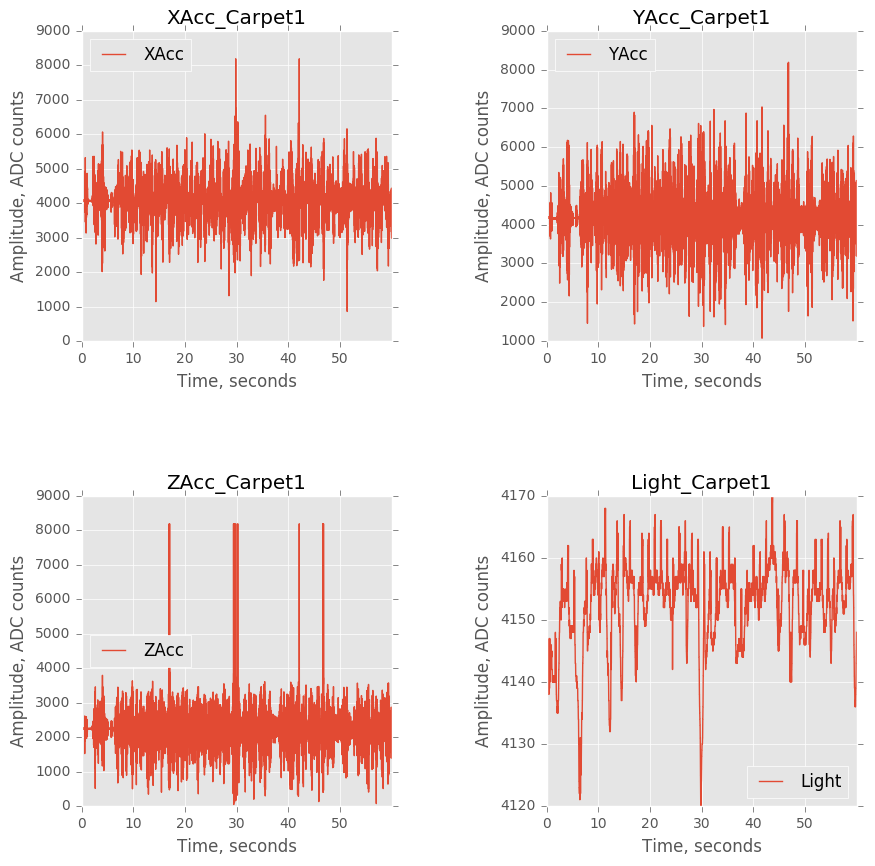

In [17]:
strClass = 'Carpet1'
plotFolder(dfData.loc[dfData['Surface'] == strClass], strClass)

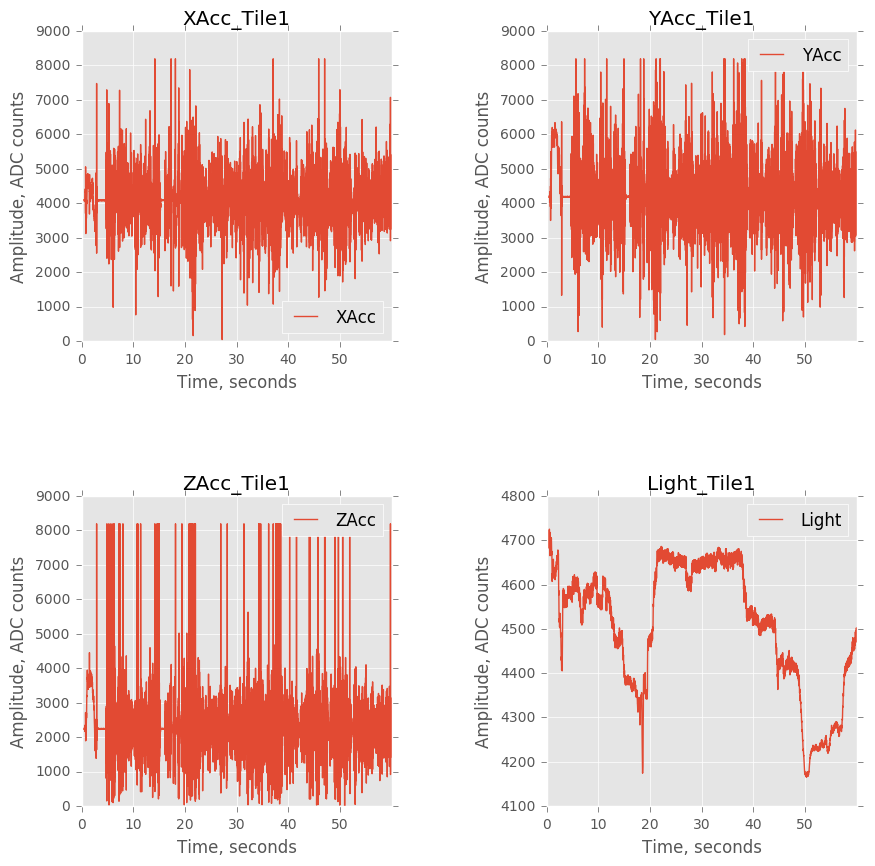

In [18]:
strClass = 'Tile1'
plotFolder(dfData.loc[dfData['Surface'] == strClass], strClass)

In [10]:
dfData.head(10)

,Light,Surface,XAcc,YAcc,ZAcc,t
0,4301.0,Cobble1,4080.0,4178.0,2237.0,0.000
1,4301.0,Cobble1,4081.0,4181.0,2227.0,0.004
2,4301.0,Cobble1,4084.0,4188.0,2239.0,0.008
3,4302.0,Cobble1,4077.0,4181.0,2242.0,0.012
4,4302.0,Cobble1,4076.0,4188.0,2240.0,0.016
5,4304.0,Cobble1,4083.0,4182.0,2237.0,0.020
6,4303.0,Cobble1,4075.0,4185.0,2233.0,0.024
7,4305.0,Cobble1,4078.0,4179.0,2232.0,0.028
8,4306.0,Cobble1,4084.0,4178.0,2235.0,0.032
9,4308.0,Cobble1,4091.0,4184.0,2236.0,0.036
